In [1]:
# Import Libraries

In [50]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import gensim.downloader as api

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.callbacks import TensorBoard


# Task 5: Text Classification

## (a) Exploratory Data Analysis

In [2]:
# Define the list of categories to load - total 20
categories = [
    "alt.atheism",
    "comp.graphics",
    "comp.os.ms-windows.misc",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "comp.windows.x",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",
    "talk.religion.misc"
]

### Load and pricess data into a variable called category_preprocessed_data

In [3]:
# Load the dataset with all 20 selected categories calling fetch_20newsgroups function as mentioned in question
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=False)

# Download NLTK resources (stopwords and tokenizer) for use later
nltk.download('stopwords')
nltk.download('punkt')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Create a dictionary to store preprocessed data by category
category_preprocessed_data = {category: [] for category in categories}

# Process each document within each category
for i in range(len(newsgroups.data)):
    category = newsgroups.target_names[newsgroups.target[i]]
    doc = newsgroups.data[i]
    
    # Tokenize the document into words - for analysis
    tokens = word_tokenize(doc)
    
    # Filter out stopwords and convert to lowercase - for comparison
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    
    # Join the filtered tokens back into a clean document
    processed_doc = ' '.join(filtered_tokens)
    
    # Append the preprocessed document to the corresponding category in the dictionary
    category_preprocessed_data[category].append(processed_doc)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahsanmuhammad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahsanmuhammad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Calculate and Visualize Class Distribution

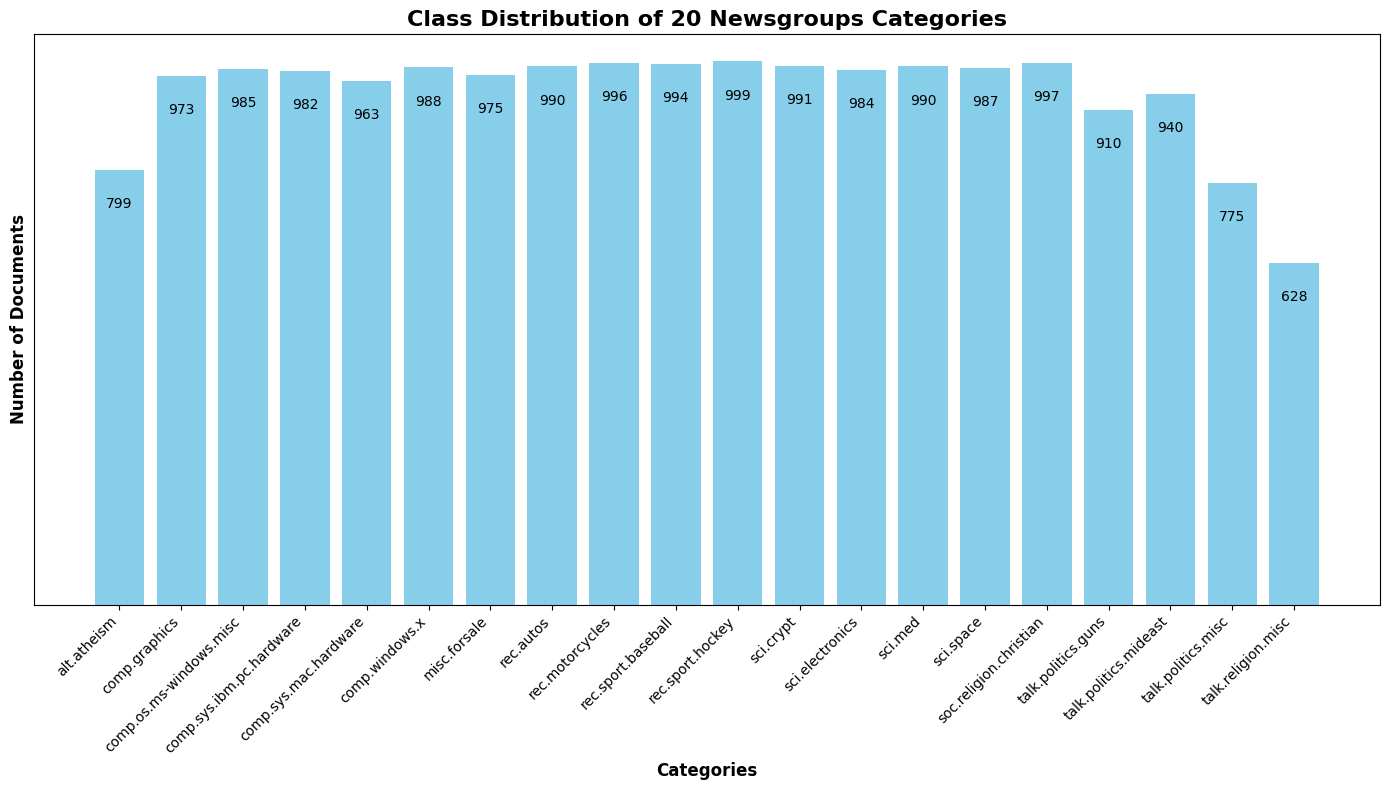

In [6]:
# List of categories and corresponding document counts
categories = list(category_preprocessed_data.keys())
class_dist = [len(category_preprocessed_data[category]) for category in categories]

# Plotting the class distribution - A bar plot 
plt.figure(figsize=(14, 8))  
bars = plt.bar(categories, class_dist, color='skyblue')

for bar, count in zip(bars, class_dist):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 50, str(count),
             ha='center', va='top', fontsize=10, color='black')

# Customize plot aesthetics - add title, x and y ticks and labels
plt.title('Class Distribution of 20 Newsgroups Categories', fontsize=16, fontweight='bold') 
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks([])

# Add axis labels
plt.xlabel('Categories', fontsize=12, fontweight='bold') 
plt.ylabel('Number of Documents', fontsize=12, fontweight='bold') 

# Add grid lines for reference
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()  
plt.show()

### Plot of Top 20 Unigrams and Bigrams

/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


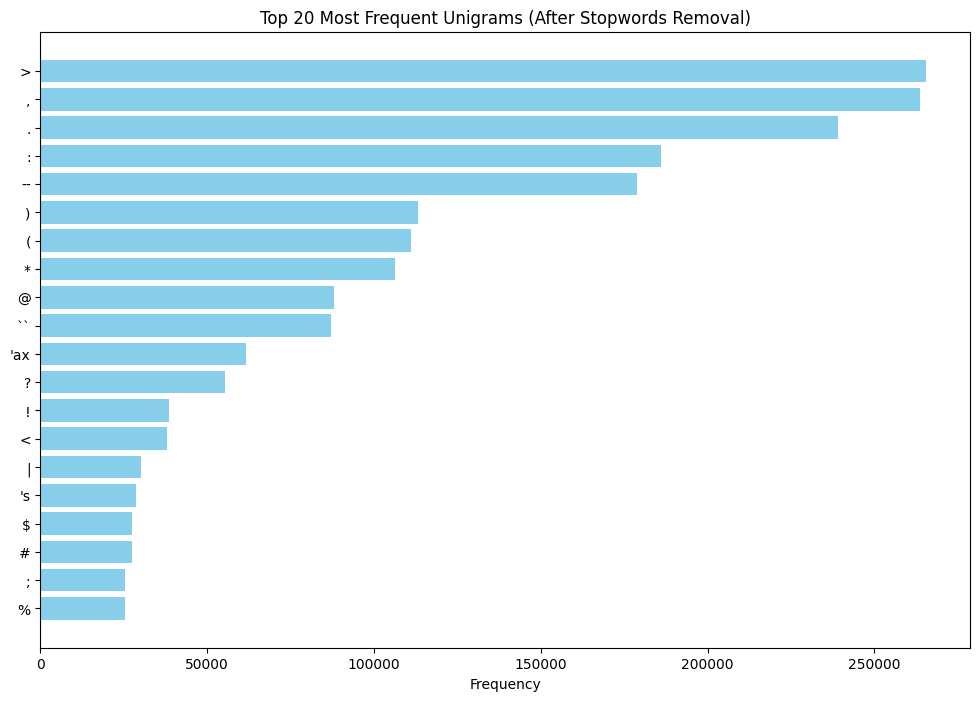

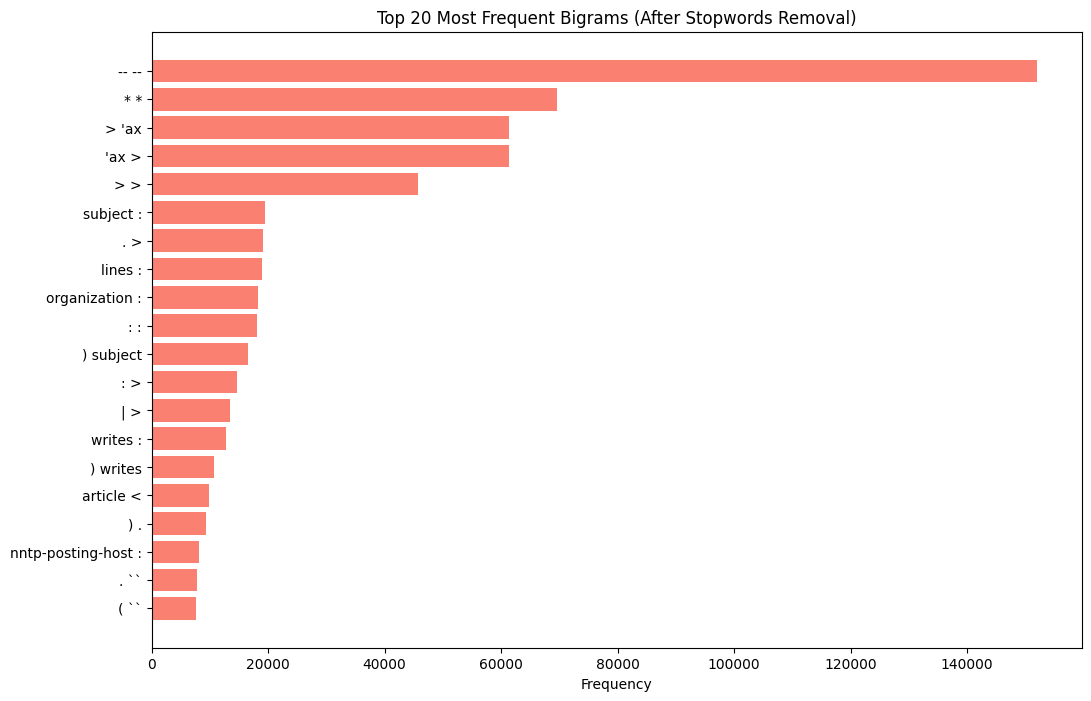

In [7]:
# Initialize CountVectorizer for unigrams and bigrams
unigram_vectorizer = CountVectorizer(analyzer='word', tokenizer=nltk.word_tokenize, ngram_range=(1, 1), max_features=10000)
bigram_vectorizer = CountVectorizer(analyzer='word', tokenizer=nltk.word_tokenize, ngram_range=(2, 2), max_features=10000)

# Create a list to store combined preprocessed text for each category
combined_text = [' '.join(category_preprocessed_data[category]) for category in categories]

# Fit and transform the combined text into document-term matrices for unigrams and bigrams
unigram_dtm = unigram_vectorizer.fit_transform(combined_text)
bigram_dtm  = bigram_vectorizer.fit_transform(combined_text)

# Get the vocabulary (mapping of feature indices to terms) for unigrams and bigrams
unigram_vocab = unigram_vectorizer.vocabulary_
bigram_vocab  = bigram_vectorizer.vocabulary_

# Create a list of terms sorted by their frequencies for unigrams and bigrams
unigram_terms_sorted_by_frequency = sorted(unigram_vocab, key=lambda x: unigram_dtm[:, unigram_vocab[x]].sum(), reverse=True)
bigram_terms_sorted_by_frequency  = sorted(bigram_vocab, key=lambda x: bigram_dtm[:, bigram_vocab[x]].sum(), reverse=True)

# Extract top 20 most frequent unigrams and bigrams and their frequencies
top_unigram_terms   = unigram_terms_sorted_by_frequency[:20]
top_bigram_terms    = bigram_terms_sorted_by_frequency[:20]
unigram_frequencies = [unigram_dtm[:, unigram_vocab[term]].sum() for term in top_unigram_terms]
bigram_frequencies  = [bigram_dtm[:, bigram_vocab[term]].sum() for term in top_bigram_terms]

# Plotting the distribution of top 20 most frequent unigrams in a separate plot
plt.figure(figsize=(12, 8))
plt.barh(top_unigram_terms, unigram_frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Unigrams (After Stopwords Removal)')
plt.gca().invert_yaxis() 
plt.show()

# Plotting the distribution of top 20 most frequent bigrams in a separate plot
plt.figure(figsize=(12, 8))
plt.barh(top_bigram_terms, bigram_frequencies, color='salmon')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams (After Stopwords Removal)')
plt.gca().invert_yaxis() 
plt.show()


In [47]:
# We see unnecessary punctuations, special characters - text needs cleaning

### Calculate total word count per category

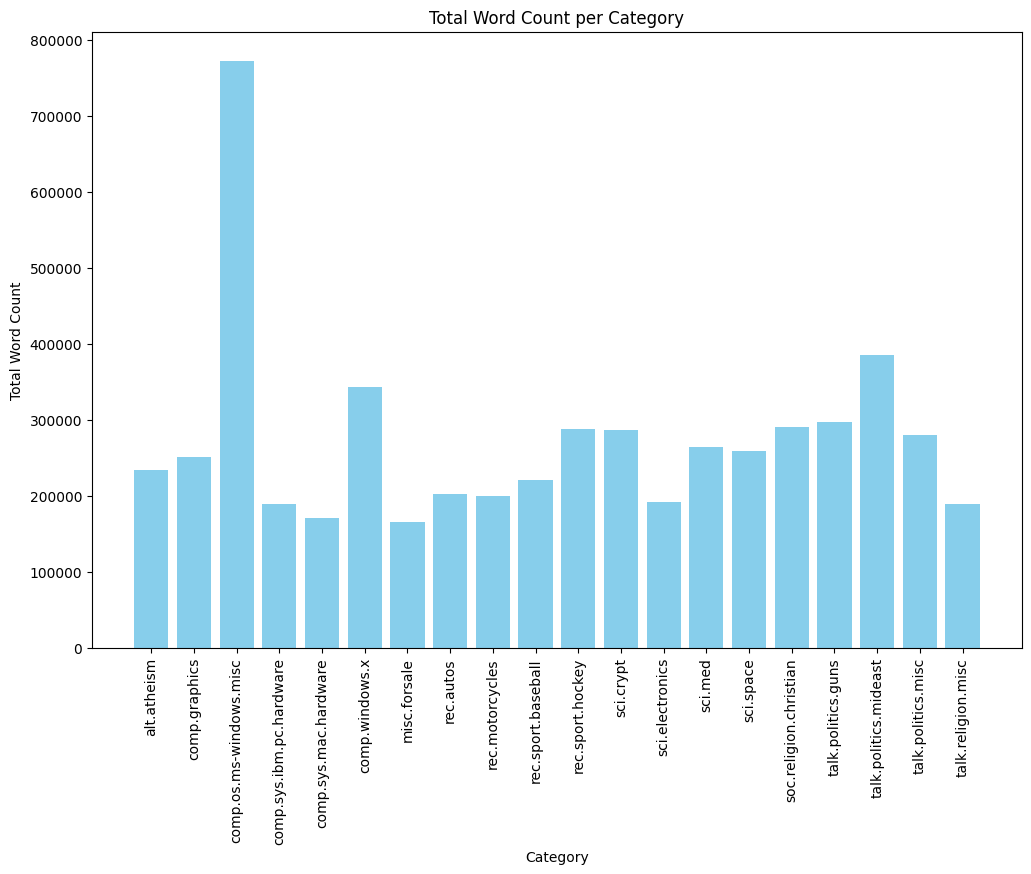

In [8]:
category_total_word_counts = {category: sum(len(doc.split()) for doc in docs)
                              for category, docs in category_preprocessed_data.items()}

# Extract category names and corresponding total word counts
categories = list(category_total_word_counts.keys())
total_word_counts = [category_total_word_counts[category] for category in categories]

# Plotting the total word counts per category
plt.figure(figsize=(12, 8))
plt.bar(categories, total_word_counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Word Count')
plt.title('Total Word Count per Category')
plt.xticks(rotation=90) 
plt.show()


### Plot wordclouds for two classes: one with the highest number of samples in the dataset and another with the lowest.

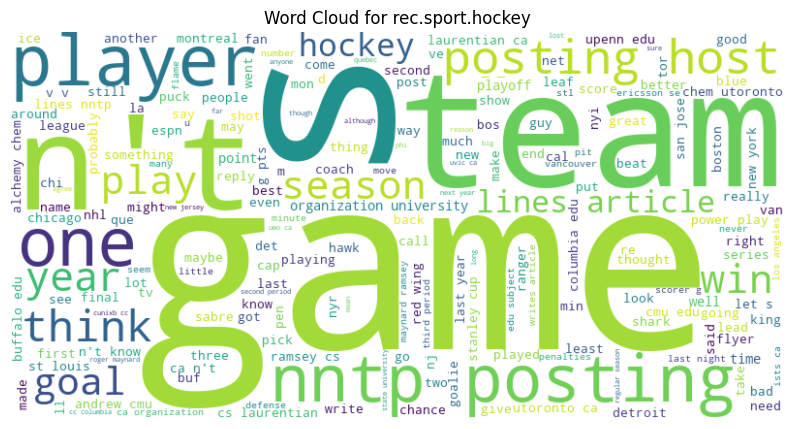

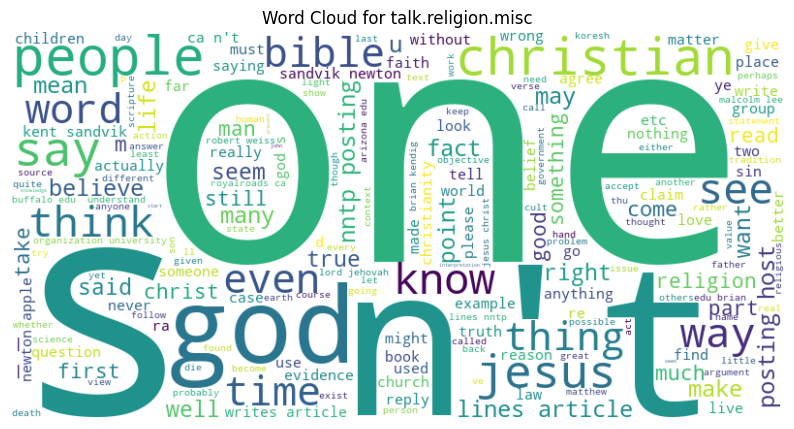

In [9]:
# Determine the class with the highest and lowest number of samples
most_samples_index  = class_dist.index(max(class_dist))
least_samples_index = class_dist.index(min(class_dist))

most_samples_class  = categories[most_samples_index]
least_samples_class = categories[least_samples_index]

# Extract text data for the classes with the most and least samples
most_samples_text  = ' '.join(category_preprocessed_data[most_samples_class])
least_samples_text = ' '.join(category_preprocessed_data[least_samples_class])

# Generate word cloud for the class with the most samples
wordcloud_most_samples = WordCloud(width=800, height=400, background_color='white').generate(most_samples_text)

# Generate word cloud for the class with the least samples
wordcloud_least_samples = WordCloud(width=800, height=400, background_color='white').generate(least_samples_text)

# Plot word cloud for the class with the most samples
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_most_samples, interpolation='bilinear')
plt.title(f'Word Cloud for {most_samples_class}')
plt.axis('off')  
plt.show()

# Plot word cloud for the class with the least samples
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_least_samples, interpolation='bilinear')
plt.title(f'Word Cloud for {least_samples_class}')
plt.axis('off') 
plt.show()

## (b) Data Pre-Processing

### Applying Stemming - Quick in terms of computation - Suffices for our needs

In [10]:
# init an instance of PorterStemmer
stemmer = PorterStemmer()

# Function to apply stemming to a text document
def apply_stemming(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Apply stemming to each word in the tokens
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    # Join the stemmed tokens back into a single string - as required
    stemmed_text = ' '.join(stemmed_tokens)
    
    return stemmed_text

# Create a new dictionary to store stemmed data by category - call it category_stemmed_data
category_stemmed_data = {category: [] for category in category_preprocessed_data}

# Process each document within each category and store stemmed text
for category, docs in category_preprocessed_data.items():
    stemmed_docs = [apply_stemming(doc) for doc in docs]
    category_stemmed_data[category] = stemmed_docs


In [11]:
# Helper function to preprocess text - remove punctuations, stopwords and special characters
def preprocess_text(text):
    # Remove punctuation using string.punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove non-English characters and special characters using regex
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    
    # Remove URLs using regex
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Strip leading and trailing whitespace
    text = text.strip()
    
    return text

In [12]:
# Create a new dictionary to store cleaned/preprocessed data by category
category_cleaned_data = {category: [] for category in category_stemmed_data}

# Process each document within each category and store cleaned text
for category, docs in category_stemmed_data.items():
    cleaned_docs = [preprocess_text(doc) for doc in docs]
    category_cleaned_data[category] = cleaned_docs

# Access cleaned/preprocessed data for a specific category - an example to see the result
print(category_cleaned_data['alt.atheism'][0]) 

keith  ccocaltechedu  keith allan schneider  subject    polit atheist  organ  california institut technolog  pasadena line  14 nntppostinghost  lloydcaltechedu bobb  viceicotekcom  robert beauchain  write   show exampl other  provid   counter exampl suppos inher  moral hypothesi  success argu  domest remov alter moral  think domest chang behavior larg degre  domest anim exhibit behavior found wild  nt think view good repres wild anim kingdom  sinc bred thousand year produc certain behavior  etc  keith


## (c) Data Split

In [13]:
# Define your data and labels (assuming you have them)
data = []
labels = []

# Iterate over each category and its corresponding preprocessed data
for category, docs in category_cleaned_data.items():
    data.extend(docs)  # Add all documents in this category to the data list
    labels.extend([category] * len(docs))  # Add corresponding category labels

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.8, random_state=42)

# Print the sizes of the training and testing sets
print(f"Number of training samples: {len(train_data)}")
print(f"Number of testing samples: {len(test_data)}")


Number of training samples: 3769
Number of testing samples: 15077


### Encoding Labels using LabelEncoder to be used in Model Training

In [14]:
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

## (d) Word Embedding

In [21]:
# Function to encode text data using GloVe embeddings
def encode_text_with_glove(text_data, embedding_model, embedding_dim):
    encoded_data = []
    for text in text_data:
        tokens = text.split() 
        # Encode each token using the GloVe embedding model and average the embeddings
        embeddings = [embedding_model[word] for word in tokens if word in embedding_model]
        if embeddings:
            averaged_embedding = np.mean(embeddings, axis=0)  # Average embeddings
        else:
            averaged_embedding = np.zeros(embedding_dim)  
        encoded_data.append(averaged_embedding)
    return np.array(encoded_data)


In [23]:
# Encode training and testing data using GloVe embeddings - using 100 dim
embedding_dim = 100  
glove_model = api.load(f"glove-wiki-gigaword-{embedding_dim}")

X_train_encoded = encode_text_with_glove(train_data, glove_model, embedding_dim)
X_test_encoded = encode_text_with_glove(test_data, glove_model, embedding_dim)

print(f"Shape of X_train_encoded: {X_train_encoded.shape}")
print(f"Shape of X_test_encoded: {X_test_encoded.shape}")

Shape of X_train_encoded: (3769, 100)
Shape of X_test_encoded: (15077, 100)


## (e) Model Designing and Training

### Defining flexible function to create a feedforward neural network to test different architectures

In [25]:
def create_feedforward_nn(input_shape, 
                          num_hidden_layers=2, 
                          hidden_layer_units=[64, 32], 
                          activations='relu',
                          learning_rate=0.01,
                          loss='mse',
                          optimizer='adam',
                          metrics=['mae']):
    model = keras.Sequential()
    
    # Adding input layer
    model.add(layers.Dense(hidden_layer_units[0], 
                           input_shape=input_shape, 
                           activation=get_activation(activations, 0)))
    
    # Adding hidden layers
    for i in range(1, num_hidden_layers):
        model.add(layers.Dense(hidden_layer_units[i], 
                               activation=get_activation(activations, i)))
    
    # Adding output layer
    model.add(layers.Dense(1))  # Assuming single output neuron for regression
    
    # Define optimizer
    optimizer = get_optimizer(optimizer, learning_rate)
    
    # Compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
    return model


def get_activation(activations, layer_index):
    if isinstance(activations, str):
        return activations 
    elif isinstance(activations, list):
        if layer_index < len(activations):
            return activations[layer_index]
        else:
            return activations[-1] 
    else:
        return 'relu' 


def get_optimizer(optimizer, learning_rate):
    if optimizer == 'adam':
        return optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        return optimizers.SGD(learning_rate=learning_rate)
    else:
        return optimizers.Adam(learning_rate=learning_rate)  # Default to Adam optimizer - usually preferred in NN

### Run & Summarize Model

In [26]:
input_shape = X_train_encoded[0].shape
model = create_feedforward_nn(input_shape,
                              num_hidden_layers=3,
                              hidden_layer_units=[64, 32, 16],
                              activations=['relu', 'relu', 'sigmoid'],
                              learning_rate=0.001,
                              loss='mse',
                              optimizer='adam',
                              metrics=['mae'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [27]:
### Train and plot results

Epoch 1/100
95/95 [==============================] - 4s 8ms/step - loss: 68.2105 - mae: 6.7457 - val_loss: 46.2903 - val_mae: 5.4750
Epoch 2/100
95/95 [==============================] - 0s 5ms/step - loss: 46.6087 - mae: 5.6429 - val_loss: 38.0993 - val_mae: 5.0340
Epoch 3/100
95/95 [==============================] - 0s 5ms/step - loss: 39.6683 - mae: 5.2901 - val_loss: 33.4022 - val_mae: 4.7858
Epoch 4/100
95/95 [==============================] - 0s 5ms/step - loss: 35.6884 - mae: 5.0946 - val_loss: 30.9232 - val_mae: 4.6833
Epoch 5/100
95/95 [==============================] - 0s 4ms/step - loss: 33.5255 - mae: 4.9731 - val_loss: 29.7534 - val_mae: 4.6433
Epoch 6/100
95/95 [==============================] - 0s 4ms/step - loss: 32.4352 - mae: 4.9189 - val_loss: 29.2765 - val_mae: 4.6308
Epoch 7/100
95/95 [==============================] - 1s 7ms/step - loss: 30.9898 - mae: 4.7675 - val_loss: 24.6499 - val_mae: 4.0036
Epoch 8/100
95/95 [==============================] - 1s 5ms/step - lo

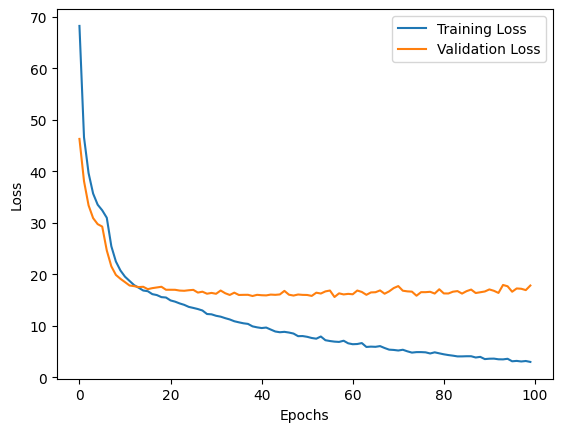

In [28]:
# Train the model on training data
history = model.fit(X_train_encoded, train_labels_encoded, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test_encoded, test_labels_encoded, verbose=0)
print(f"Test Mean Absolute Error: {mae:.2f}")

# Make predictions using the trained model
y_pred = model.predict(X_test_encoded)

# Calculate additional performance metrics (e.g., MAE)
mae = mean_absolute_error(test_labels_encoded, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Optionally, plot training history (e.g., loss and metrics over epochs)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## (f) Model Evaluation

In [32]:
# Define a list of model configurations to try
model_configs = [
    {
        'num_hidden_layers': 2,
        'hidden_layer_units': [64, 32],
        'activations': 'relu',
        'learning_rate': 0.01,
        'optimizer': optimizers.Adam,
        'loss': 'mse',
        'metrics': ['mae'],
        # 'dropout_rate': 0.2
    },
    {
        'num_hidden_layers': 3,
        'hidden_layer_units': [128, 64, 32],
        'activations': 'relu',
        'learning_rate': 0.001,
        'optimizer': optimizers.Adam,
        'loss': 'mse',
        'metrics': ['mae'],
        # 'dropout_rate': 0.3
    },
    {
        'num_hidden_layers': 2,
        'hidden_layer_units': [32, 16],
        'activations': 'tanh',
        'learning_rate': 0.001,
        'optimizer': optimizers.SGD,
        'loss': 'mse',
        'metrics': ['mae'],
        # 'dropout_rate': 0.1
    },
    {
        'num_hidden_layers': 4,
        'hidden_layer_units': [128, 64, 64, 32],
        'activations': 'tanh',
        'learning_rate': 0.001,
        'optimizer': optimizers.SGD,
        'loss': 'mse',
        'metrics': ['mae'],
        # 'dropout_rate': 0.1
    },
    {
        'num_hidden_layers': 4,
        'hidden_layer_units': [128, 64, 64, 32],
        'activations': 'relu',
        'learning_rate': 0.001,
        'optimizer': optimizers.Adam,
        'loss': 'mse',
        'metrics': ['mae'],
        # 'dropout_rate': 0.1
    }
]

### Evaluate & Tensorboard on Best Model

In [52]:
# Helper to fit model and evaluate results - only displays on tensorboard for best model
def fit_and_evaluate_best_model(X_train_encoded, train_labels_encoded, X_test_encoded, test_labels_encoded, model_configs):
    results = []

    # Iterate over each model configuration
    for idx, config in enumerate(model_configs):
        print(f"Running experiment {idx + 1}/{len(model_configs)} with configuration: {config}")
        
        # Create and compile the model based on the configuration
        model = create_feedforward_nn(input_shape=X_train_encoded.shape[1:], **config)
        
        # Train the model - X_train and train_labels passed with 100 eps and 32 batch size
        history = model.fit(X_train_encoded, train_labels_encoded, epochs=100, batch_size=32,
                            validation_split=0.2, verbose=0)
        
        # Evaluate the model on test data
        loss, mae = model.evaluate(X_test_encoded, test_labels_encoded, verbose=0)
        print(f"Test Mean Absolute Error: {mae:.2f}")
        
        # Predict test labels - to calc accuracy later
        y_pred = model.predict(X_test_encoded)
        y_pred_classes = np.argmax(y_pred, axis=1) 
        
        # Calculate accuracy
        accuracy = accuracy_score(test_labels_encoded, y_pred_classes)
        print(f"Test Accuracy: {accuracy:.2f}")
        
        # Calculate F1 scores (Micro and Macro)
        f1_micro = f1_score(test_labels_encoded, y_pred_classes, average='micro')
        f1_macro = f1_score(test_labels_encoded, y_pred_classes, average='macro')
        print(f"Test F1 Micro: {f1_micro:.2f}")
        print(f"Test F1 Macro: {f1_macro:.2f}")
        
        # Calculate classification report
        class_report = classification_report(test_labels_encoded, y_pred_classes)
        print("Classification Report:")
        print(class_report)
        
        # Store results for the current model configuration
        results.append({
            'config': config,
            'loss': loss,
            'mae': mae,
            'accuracy': accuracy,
            'f1_micro': f1_micro,
            'f1_macro': f1_macro,
            'class_report': class_report,
            'history': history
        })

    # Find the best model configuration based on Mean Absolute Error (MAE) - This will be used to run TensorBoard
    best_result = min(results, key=lambda x: x['mae'])
    best_model_config = best_result['config']
    best_model_loss = best_result['loss']
    best_model_mae = best_result['mae']
    best_model_accuracy = best_result['accuracy']
    best_model_f1_micro = best_result['f1_micro']
    best_model_f1_macro = best_result['f1_macro']
    best_model_class_report = best_result['class_report']
    best_model_history = best_result['history']

    # Log the best model using TensorBoard
    best_model = create_feedforward_nn(input_shape=X_train_encoded.shape[1:], **best_model_config)
    log_dir = f"./logs/{datetime.now().strftime('%Y%m%d-%H%M%S')}_best_model"
    
    # Define TensorBoard callback for the best model only
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    # Train the best model with TensorBoard callback for visualization
    best_model.fit(X_train_encoded, train_labels_encoded, epochs=100, batch_size=32,
                   validation_split=0.2, callbacks=[tensorboard_callback])

    print(f"\nBest Configuration (based on MAE): {best_model_config}")
    print(f"Best Model Test MAE: {best_model_mae:.2f}")
    print(f"Best Model Test Accuracy: {best_model_accuracy:.2f}")
    print(f"Best Model Test F1 Micro: {best_model_f1_micro:.2f}")
    print(f"Best Model Test F1 Macro: {best_model_f1_macro:.2f}")
    print("Best Model Classification Report:")
    print(best_model_class_report)

    return best_model, best_model_config, best_model_loss, best_model_mae, best_model_accuracy, best_model_f1_micro, best_model_f1_macro, best_model_class_report, best_model_history



best_model, best_model_config, best_model_loss, best_model_mae, best_model_accuracy, best_model_f1_micro, best_model_f1_macro, best_model_class_report, best_model_history = fit_and_evaluate_best_model(X_train_encoded, train_labels_encoded, X_test_encoded, test_labels_encoded, model_configs)

Running experiment 1/5 with configuration: {'num_hidden_layers': 2, 'hidden_layer_units': [64, 32], 'activations': 'relu', 'learning_rate': 0.01, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'loss': 'mse', 'metrics': ['mae']}
Test Mean Absolute Error: 2.95
472/472 [==============================] - 1s 2ms/step
Test Accuracy: 0.04
Test F1 Micro: 0.04
Test F1 Macro: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.04      1.00      0.08       651
           1       0.00      0.00      0.00       786
           2       0.00      0.00      0.00       778
           3       0.00      0.00      0.00       783
           4       0.00      0.00      0.00       773
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       776
           7       0.00      0.00      0.00       792
           8       0.00      0.00      0.00       808
           9       0.00      0.00      0.00       807
    

/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score 

Test Mean Absolute Error: 2.79
472/472 [==============================] - 2s 3ms/step
Test Accuracy: 0.04
Test F1 Micro: 0.04
Test F1 Macro: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.04      1.00      0.08       651
           1       0.00      0.00      0.00       786
           2       0.00      0.00      0.00       778
           3       0.00      0.00      0.00       783
           4       0.00      0.00      0.00       773
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       776
           7       0.00      0.00      0.00       792
           8       0.00      0.00      0.00       808
           9       0.00      0.00      0.00       807
          10       0.00      0.00      0.00       801
          11       0.00      0.00      0.00       780
          12       0.00      0.00      0.00       778
          13       0.00      0.00      0.00       803
          14       0

/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score 

Test Mean Absolute Error: 2.69
472/472 [==============================] - 1s 2ms/step
Test Accuracy: 0.04
Test F1 Micro: 0.04
Test F1 Macro: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.04      1.00      0.08       651
           1       0.00      0.00      0.00       786
           2       0.00      0.00      0.00       778
           3       0.00      0.00      0.00       783
           4       0.00      0.00      0.00       773
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       776
           7       0.00      0.00      0.00       792
           8       0.00      0.00      0.00       808
           9       0.00      0.00      0.00       807
          10       0.00      0.00      0.00       801
          11       0.00      0.00      0.00       780
          12       0.00      0.00      0.00       778
          13       0.00      0.00      0.00       803
          14       0

/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score 

Test Mean Absolute Error: 2.69
472/472 [==============================] - 1s 2ms/step
Test Accuracy: 0.04
Test F1 Micro: 0.04
Test F1 Macro: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.04      1.00      0.08       651
           1       0.00      0.00      0.00       786
           2       0.00      0.00      0.00       778
           3       0.00      0.00      0.00       783
           4       0.00      0.00      0.00       773
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       776
           7       0.00      0.00      0.00       792
           8       0.00      0.00      0.00       808
           9       0.00      0.00      0.00       807
          10       0.00      0.00      0.00       801
          11       0.00      0.00      0.00       780
          12       0.00      0.00      0.00       778
          13       0.00      0.00      0.00       803
          14       0

/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score 

Test Mean Absolute Error: 2.63
472/472 [==============================] - 2s 3ms/step
Test Accuracy: 0.04
Test F1 Micro: 0.04
Test F1 Macro: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.04      1.00      0.08       651
           1       0.00      0.00      0.00       786
           2       0.00      0.00      0.00       778
           3       0.00      0.00      0.00       783
           4       0.00      0.00      0.00       773
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       776
           7       0.00      0.00      0.00       792
           8       0.00      0.00      0.00       808
           9       0.00      0.00      0.00       807
          10       0.00      0.00      0.00       801
          11       0.00      0.00      0.00       780
          12       0.00      0.00      0.00       778
          13       0.00      0.00      0.00       803
          14       0

/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score 

Epoch 1/100
95/95 [==============================] - 4s 13ms/step - loss: 40.6487 - mae: 5.1456 - val_loss: 20.8474 - val_mae: 3.6817
Epoch 2/100
95/95 [==============================] - 1s 6ms/step - loss: 20.1354 - mae: 3.4530 - val_loss: 18.2857 - val_mae: 3.2836
Epoch 3/100
95/95 [==============================] - 1s 6ms/step - loss: 18.5136 - mae: 3.2561 - val_loss: 17.5108 - val_mae: 3.1512
Epoch 4/100
95/95 [==============================] - 1s 6ms/step - loss: 17.6623 - mae: 3.1409 - val_loss: 16.9775 - val_mae: 3.0835
Epoch 5/100
95/95 [==============================] - 1s 6ms/step - loss: 16.5815 - mae: 3.0238 - val_loss: 16.7130 - val_mae: 3.0712
Epoch 6/100
95/95 [==============================] - 1s 6ms/step - loss: 15.9785 - mae: 2.9736 - val_loss: 16.2953 - val_mae: 3.0081
Epoch 7/100
95/95 [==============================] - 1s 6ms/step - loss: 15.0750 - mae: 2.8556 - val_loss: 15.7730 - val_mae: 2.9791
Epoch 8/100
95/95 [==============================] - 1s 9ms/step - l

ValueError: too many values to unpack (expected 6)

### RUN TENSORBOARD

In [ ]:
!tensorboard --logdir=./logs

/Users/ahsanmuhammad/OneDrive/Documents/github/natural-language-processing-uni-kiel-ss24/myenv/lib/python3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.13.0 at http://localhost:6006/ (Press CTRL+C to quit)
